<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Sultan Fahrezy Syahdwinata Nugraha"
KELAS = "C"
NPM = "2006533811"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sultan Fahrezy Syahdwinata Nugraha dari kelas C dengan NPM 2006533811, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sultan Fahrezy Syahdwinata Nugraha)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import scipy.stats as scp
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [ ]:
df = pd.read_csv('mobile_phone.csv')

# Ringkasan data keseluruhan
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 2021
Jumlah atribut: 21


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,NaN,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,NaN,141,2,...,1208,1212,1411.0,8,2,15.0,1,1.0,0.0,1


In [ ]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

In [ ]:
# Melihat statistik deskriptif dari masing-masing kolom numerik
# Karena semua atribut telah diencode maka tidak ada lagi kolom kategorikal
# Kita akan meng-exclude atribut yang sebenarnya merupakan kategorikal namun telah diubah dengan encode
# atribut tersebut adalah ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
df_numerical = df.drop(columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'])
df_numerical.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2021.000000,1920.000000,2021.000000,1915.000000,1928.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,1927.000000,2021.000000,2021.000000,1937.000000
mean,1239.205344,1.521302,4.303810,32.086162,0.501556,140.272143,4.532905,9.938149,646.858981,1249.240970,2120.320187,12.323602,5.790203,11.022716
std,439.916748,0.816020,4.330382,18.198040,0.289261,35.393281,2.291511,6.054671,445.159739,433.141437,1079.774853,4.213155,4.369054,5.459042
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,852.000000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,874.000000,1210.500000,9.000000,2.000000,6.000000
50%,1230.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,567.000000,1245.000000,2130.000000,12.000000,5.000000,11.000000
75%,1617.000000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.000000,1633.000000,3033.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [ ]:
# Melihat statistik deskriptif atribut yang di-exclude pada sebelumnya
def categorical_desc_statistics(column):
  count = df[column].count()
  unique = df[column].unique()
  top = df[column].mode()
  print(column)
  print("count: " + str(count))
  print("unique: " + str(unique))
  print("top: " + str(top))
  display(df[column].value_counts())
  print("\n")

categorical_attr = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
for i in categorical_attr:
  categorical_desc_statistics(i)


blue
count: 2021
unique: [0 1]
top: 0    0
dtype: int64


0    1026
1     995
Name: blue, dtype: int64



dual_sim
count: 2021
unique: [0 1]
top: 0    1
dtype: int64


1    1022
0     999
Name: dual_sim, dtype: int64



four_g
count: 2021
unique: [0 1]
top: 0    1
dtype: int64


1    1059
0     962
Name: four_g, dtype: int64



three_g
count: 2021
unique: [0 1]
top: 0    1
dtype: int64


1    1541
0     480
Name: three_g, dtype: int64



touch_screen
count: 1925
unique: [ 0.  1. nan]
top: 0    1.0
dtype: float64


1.0    972
0.0    953
Name: touch_screen, dtype: int64



wifi
count: 1922
unique: [ 1.  0. nan]
top: 0    1.0
dtype: float64


1.0    973
0.0    949
Name: wifi, dtype: int64



price_range
count: 2021
unique: [1 2 3 0]
top: 0    2
dtype: int64


2    513
1    506
3    502
0    500
Name: price_range, dtype: int64

In [ ]:
# Menghitung jumlah missing values
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df)

              Total   Percent
int_memory      106  0.052449
clock_speed     101  0.049975
wifi             99  0.048986
touch_screen     96  0.047501
ram              94  0.046512
m_dep            93  0.046017
talk_time        84  0.041564


In [ ]:
# Menghitung jumlah duplikasi data
df_duplicated_counts = df.duplicated().sum()
print("Jumlah duplicated data adalah: " + str(df_duplicated_counts))

Jumlah duplicated data adalah: 21


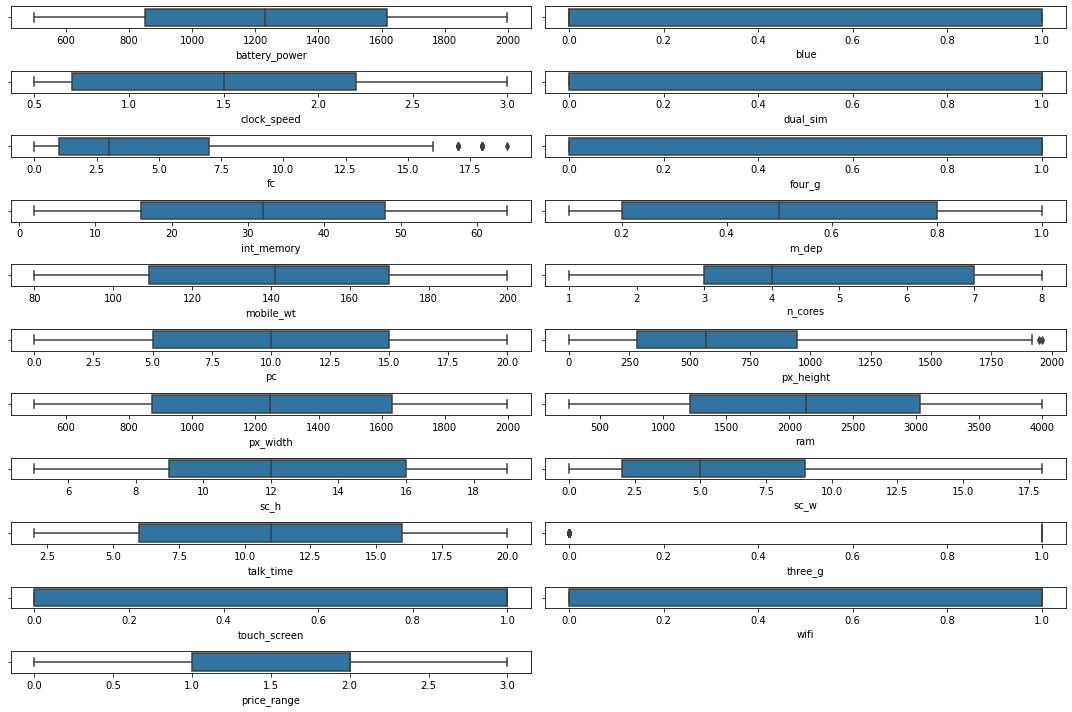

In [ ]:
# Melakukan pengecekan terhadap outliers
#cek outlier dengan boxplot
list_tmp = []
for cols in df.select_dtypes(np.number).columns:
    list_tmp.append(cols)

plt.figure(figsize=(15, 10))
for i in range(len(list_tmp)):
    plt.subplot(11, 2, i+1)
    sns.boxplot(x=df[list_tmp[i]])
    plt.tight_layout()

Dapat dilihat terdapat outliers pada fc dan px_height

2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

Akan dicoba lakukan penanganan terhadap missing values, duplicated data, dan outliers.

In [ ]:
# Penanganan terhadap missing values
# Missing values akan digantikan dengan mean
missing_col = ['int_memory', 'clock_speed', 'wifi', 'touch_screen', 'ram', 'm_dep', 'talk_time']
for i in missing_col:
  df[i] = df[i].fillna(df[i].mean())

cek_null(df)

Empty DataFrame
Columns: [Total, Percent]
Index: []


Dapat dilihat sudah tidak ada lagi missing value pada dataframe tersebut.

In [ ]:
# Penanganan terhadap duplicated data
# Karena hanya terdapat 21 data saja yang merupakan duplikasi maka data tersebut akan didrop
df.drop_duplicates(inplace=True)
df = df.reset_index()
display(df)

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7.0,0.600000,188,...,20,756,2549.0,9,7,11.022716,0,0.0,1.0,1
1,1,1021,1,0.5,1,0,1,53.0,0.700000,136,...,905,1988,2631.0,17,3,7.000000,1,1.0,0.0,2
2,2,563,1,0.5,1,2,1,41.0,0.900000,145,...,1263,1716,2603.0,11,2,9.000000,1,1.0,0.0,2
3,3,615,1,2.5,0,0,0,10.0,0.800000,131,...,1216,1786,2769.0,16,8,11.000000,1,0.0,0.0,2
4,4,1821,1,1.2,0,13,1,44.0,0.501556,141,...,1208,1212,1411.0,8,2,15.000000,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2016,794,1,0.5,1,0,1,2.0,0.800000,106,...,1222,1890,668.0,13,4,19.000000,1,1.0,0.0,0
1996,2017,1965,1,2.6,1,0,0,39.0,0.501556,187,...,915,1965,2032.0,11,10,16.000000,1,1.0,1.0,2
1997,2018,1911,0,0.9,1,1,1,36.0,0.700000,108,...,868,1632,3057.0,9,1,5.000000,1,1.0,0.0,3
1998,2019,1512,0,0.9,0,4,1,46.0,0.501556,145,...,336,670,869.0,18,10,19.000000,1,1.0,1.0,0


In [ ]:
df_duplicated_counts = df.duplicated().sum()
print("Jumlah duplicated data adalah: " + str(df_duplicated_counts))

Jumlah duplicated data adalah: 0


Semua duplicated data telah ditangani.

In [ ]:
# Akan dilakukan penanganan terhadap outliers data
# Dapat dilihat dari boxplot baik fc dan px_hieght memiliki persebaran data yang skewed
# oleh karena itu akan digunakan median untuk menggantikan outliers
def outlier_median(variable):
  Q1 = df[variable].quantile(0.25)
  Q3 = df[variable].quantile(0.75)
  IQR = Q3 - Q1
  before = ((df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR))).sum()
  # untuk mencari outliers
  outliers = (df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR)).to_frame('Outliers?')

  # untuk mencari median cylindernumbers
  # median dipilih karena jumlah outliers yang sangat besar sehingga mean tidak akan bagus
  median = df[variable].median()

  # untuk mencari index dari outliers untuk keperluan loc
  index_outlier = outliers.index[outliers['Outliers?'] == True].tolist()
  # mengganti nilai outliers dengan median
  df.loc[index_outlier,variable] = median

  after = ((df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR))).sum()

  print(variable + ' ' + str(before) + ' vs ' + str(after) )

outliers_col = ['fc', 'px_height']
for i in outliers_col:
  outlier_median(i)



fc 18 vs 0
px_height 2 vs 0


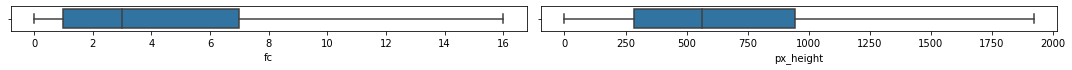

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(len(outliers_col)):
    plt.subplot(11, 2, i+1)
    sns.boxplot(x=df[outliers_col[i]])
    plt.tight_layout()

3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


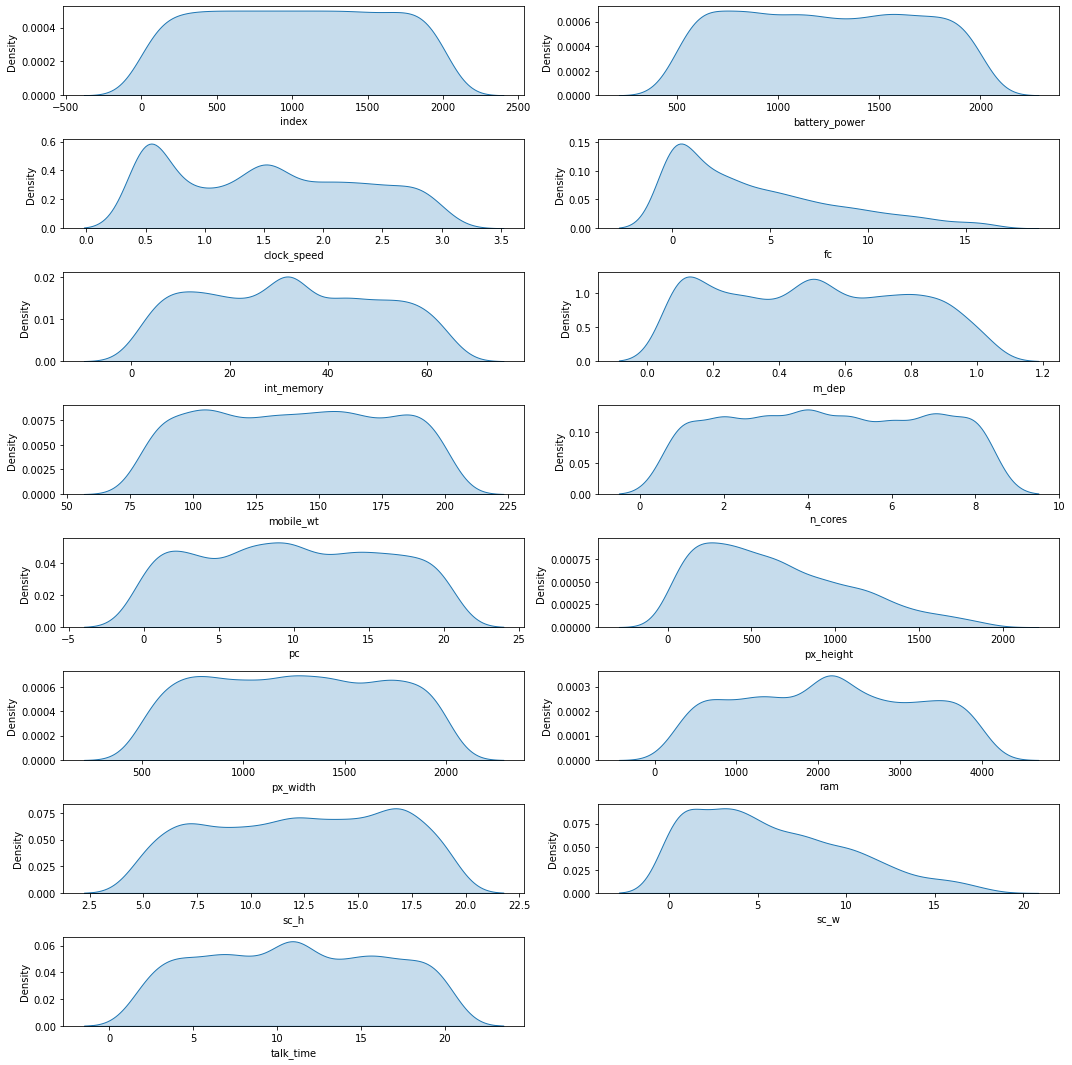

In [ ]:
# Untuk menentukann metode normalisasi mana yang paling tepat digunakan untuk data numerik kita
# kita perlu terlebih dahulu melihat karakteristik persebaran data kita
df_numerical = df.drop(columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'])

plt.figure(figsize=(15, 20))
for i in range(len(df_numerical.columns)):
    plt.subplot(11, 2, i+1)
    sns.kdeplot(df[df_numerical.columns[i]], shade=True)
    plt.tight_layout()

Jawaban:
Metode normalisasi yang dipilih adalah min-max scaling atau yang dapat juga disebut scaling to range. Metode ini dipilih karena persebaran data kita mayoritas kurang lebih tersebar secara uniform dan outliers yang kita miliki sudah dibersihkan sehingga metode ini tepat untuk digunakan.

Referensi: https://developers.google.com/machine-learning/data-prep/transform/normalization

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df_numerical)
df_numerical_normalized = scaler.transform(df_numerical)
df_numerical_normalized_df = pd.DataFrame(df_numerical_normalized)

# view normalized data
display(df_numerical_normalized_df)
print("\n")
counter = 0

for i in df_numerical.columns:
  df[i] = df_numerical_normalized_df[counter]
  counter+=1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.227789,0.68,0.0625,0.080645,0.555556,0.900000,0.142857,0.10,0.010417,0.170895,0.612774,0.285714,0.388889,0.501262
1,0.000495,0.347361,0.00,0.0000,0.822581,0.666667,0.466667,0.285714,0.30,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.000990,0.041416,0.00,0.1250,0.629032,0.888889,0.541667,0.571429,0.30,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.001485,0.076152,0.80,0.0000,0.129032,0.777778,0.425000,0.714286,0.45,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.001980,0.881764,0.28,0.8125,0.677419,0.446173,0.508333,0.142857,0.70,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.998020,0.195725,0.00,0.0000,0.000000,0.777778,0.216667,0.714286,0.70,0.636458,0.927904,0.110102,0.571429,0.222222,0.944444
1996,0.998515,0.977956,0.84,0.0000,0.596774,0.446173,0.891667,0.428571,0.15,0.476562,0.977971,0.474613,0.428571,0.555556,0.777778
1997,0.999010,0.941884,0.16,0.0625,0.548387,0.666667,0.233333,1.000000,0.15,0.452083,0.755674,0.748530,0.285714,0.055556,0.166667
1998,0.999505,0.675351,0.16,0.2500,0.709677,0.446173,0.541667,0.571429,0.25,0.175000,0.113485,0.163816,0.928571,0.555556,0.944444


Berikut adalah penampakan data setelah dilakukan normalisasi

In [ ]:
df

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.000000,0.227789,0,0.68,0,0.0625,0,0.080645,0.555556,0.900000,...,0.010417,0.170895,0.612774,0.285714,0.388889,0.501262,0,0.0,1.0,1
1,0.000495,0.347361,1,0.00,1,0.0000,1,0.822581,0.666667,0.466667,...,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778,1,1.0,0.0,2
2,0.000990,0.041416,1,0.00,1,0.1250,1,0.629032,0.888889,0.541667,...,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889,1,1.0,0.0,2
3,0.001485,0.076152,1,0.80,0,0.0000,0,0.129032,0.777778,0.425000,...,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000,1,0.0,0.0,2
4,0.001980,0.881764,1,0.28,0,0.8125,1,0.677419,0.446173,0.508333,...,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.998020,0.195725,1,0.00,1,0.0000,1,0.000000,0.777778,0.216667,...,0.636458,0.927904,0.110102,0.571429,0.222222,0.944444,1,1.0,0.0,0
1996,0.998515,0.977956,1,0.84,1,0.0000,0,0.596774,0.446173,0.891667,...,0.476562,0.977971,0.474613,0.428571,0.555556,0.777778,1,1.0,1.0,2
1997,0.999010,0.941884,0,0.16,1,0.0625,1,0.548387,0.666667,0.233333,...,0.452083,0.755674,0.748530,0.285714,0.055556,0.166667,1,1.0,0.0,3
1998,0.999505,0.675351,0,0.16,0,0.2500,1,0.709677,0.446173,0.541667,...,0.175000,0.113485,0.163816,0.928571,0.555556,0.944444,1,1.0,1.0,0


4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

In [ ]:
# Kita akan mencari jumlah feature yang paling efektif untuk digunakan menggunakan PCA dan correlation
# pertama bagi terlebih dahulu feature dan target
features = df.drop(columns=['price_range'])
target = df.drop(columns=np.array(features.columns))

In [ ]:
# initialize PCA
pca = PCA()

# Fit the model with "scaled_data".
pca.fit(features)

trans_pca = pca.transform(features)

# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.12986863, 0.09800062, 0.09368359, 0.09007081, 0.08617741,
       0.04921764, 0.04430628, 0.0404548 , 0.03978817, 0.03771652,
       0.0365899 , 0.03441286, 0.0334629 , 0.0321835 , 0.03183108,
       0.03071044, 0.02859804, 0.02776013, 0.01293811, 0.01146752,
       0.01076106])

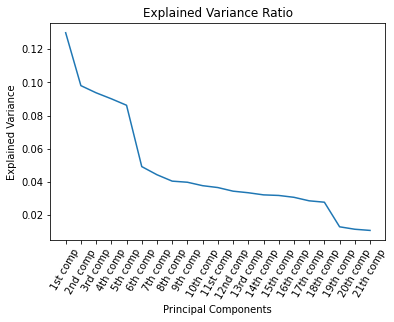

In [ ]:
plt.plot(range(0,21), explained_variants)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(0,21),
           ["1st comp", "2nd comp", "3rd comp", "4th comp", "5th comp", "6th comp",  "7th comp", "8th comp", "9th comp", "10th comp", "11st comp", "12nd comp", "13rd comp", "14th comp", "15th comp", "16th comp",  "17th comp", "18th comp", "19th comp", "20th comp", "21th comp"], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

In [ ]:
df_corr = df.corr(method='pearson')

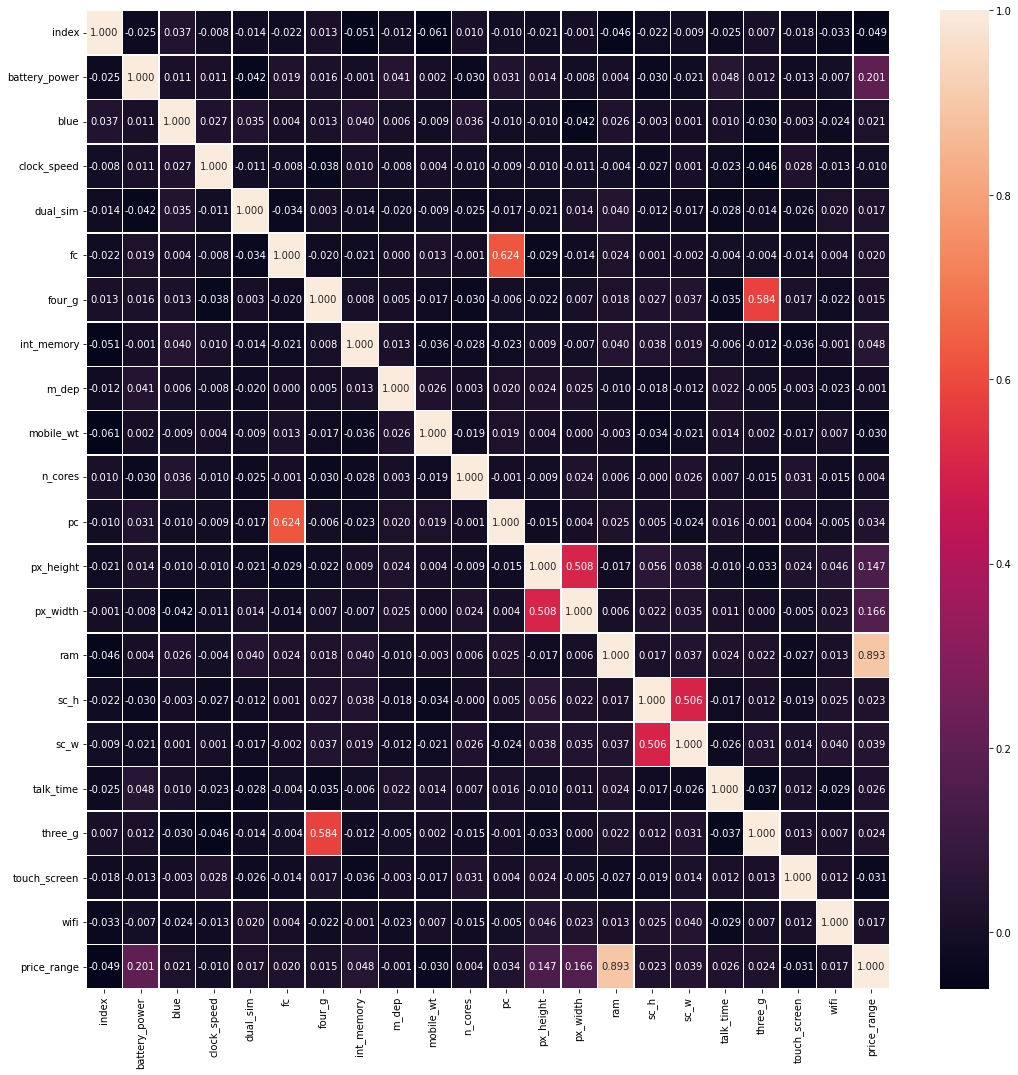

In [ ]:
# heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt= '.3f',ax=ax)

In [ ]:
# Menggunakan K Best Fit untuk cross checkt terhadap 2 cara sebelumnya
def k_best(n):
  selector = SelectKBest(f_classif, k=n) # kita akan memilih 2 variable terbaik dari features kita
  X = selector.fit_transform(features, target.values.ravel())
  input_features = selector.feature_names_in_
  print("Features terbaik untuk K = " + str(n))
  print(selector.get_feature_names_out(input_features=input_features))

for i in range(1,10):
  k_best(i)

Features terbaik untuk K = 1
['ram']
Features terbaik untuk K = 2
['battery_power' 'ram']
Features terbaik untuk K = 3
['battery_power' 'px_width' 'ram']
Features terbaik untuk K = 4
['battery_power' 'px_height' 'px_width' 'ram']
Features terbaik untuk K = 5
['battery_power' 'mobile_wt' 'px_height' 'px_width' 'ram']
Features terbaik untuk K = 6
['battery_power' 'int_memory' 'mobile_wt' 'px_height' 'px_width' 'ram']
Features terbaik untuk K = 7
['battery_power' 'int_memory' 'mobile_wt' 'n_cores' 'px_height' 'px_width'
 'ram']
Features terbaik untuk K = 8
['battery_power' 'int_memory' 'mobile_wt' 'n_cores' 'px_height' 'px_width'
 'ram' 'sc_h']
Features terbaik untuk K = 9
['battery_power' 'int_memory' 'mobile_wt' 'n_cores' 'px_height' 'px_width'
 'ram' 'sc_h' 'talk_time']


> Jawaban:
Sesuai dengan elbow method dan tabel korelasi kita akan mengambil 4 fitur yang memiliki korelasi paling besar dengan target. Jumlah 4 tersebut dimasukkan ke fungsi K Best Fit dan didapatkan fitur berupa 'battery_power' 'px_height' 'px_width' 'ram'. Hal ini sesuai dengan tabel korelasi dimana 4 fitur tersebut lah yang memiliki korelasi paling besar.

>

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [ ]:

kf = KFold(n_splits=5)
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
features = features[['battery_power', 'px_height', 'px_width', 'ram']]
for train_index, test_index in kf.split(features):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = features.iloc[train_index], features.iloc[test_index]
  y_train, y_test = target.iloc[train_index], target.iloc[test_index]
  X_train_list.append(X_train)
  X_test_list.append(X_test)
  y_train_list.append(y_train)
  y_test_list.append(y_test)

TRAIN: [ 400  401  402 ... 1997 1998 1999] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

### [19] Decision Tree

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
# Melakukan training pada model decision tree
dt_md2 = DecisionTreeClassifier()

In [ ]:
# Call the metrics function
scores = cross_validate(dt_md2, features, target, cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.81093532 0.83625805 0.84212675 0.85730803 0.82544381]
Average score: 0.8344143910804072


8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [ ]:
# Melakukan training pada model decision tree
dt_md3 = DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
# Call the metrics function
scores = cross_validate(dt_md3, features, target, cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.8010932  0.74495394 0.78710076 0.7605225  0.75688551]
Average score: 0.770111183261947


9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban:
Yang nomor 7 lebih baik, karena pada model itu berarti sample leaf yang terbentuk bisa jadi kurang dari 50 sehingga ketika diberikan parameter min leaf 50 maka tree yang terbuat terpaksa mengikuti persyaratan tersebut. Contohnya ketika tidak dibatasi oleh `min_samples_leaf` = 50 model kita dapat terus membagi data yang dimilikinya. Sementara ketika sudah diberikan parameter `min_samples_leaf` = 50 maka semisalnya model kita sedang memiliki 99 data pada suatu internal node, maka pembelahannya sudah akan terhenti disitu karena parameter tersebut mewajibkan leaf untuk memiliki 50 data sehingga minimal jika terbagi menjadi 2 leaf sebuah internal node harus memiliki 100 data. Atau bahkan ketika sebuah internal node memiliki 100 data namun terbagi menjadi 60-40 maka pembagian tersebut akan digagalkan karena 40 tidak memenuhi parameter `min_samples_leaf`=50

>

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 5, 20, 50],
               'max_depth' : [5, 10, 12, None, 20, 30],
              'min_samples_leaf' : [1, 5, 20, 50]}

dt = DecisionTreeClassifier()

clf2 = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= kf)

clf2.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, None, 20, 30],
                         'min_samples_leaf': [1, 5, 20, 50],
                         'min_samples_split': [2, 5, 20, 50]})

In [ ]:
clf2.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
# Melakukan training pada model decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

In [ ]:
# Call the metrics function
scores = cross_validate(dt, features, target, cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.83919181 0.83183422 0.84396971 0.83188594 0.82716315]
Average score: 0.8348089668415177


### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
# Melakukan training pada model random forest
rf_md = RandomForestClassifier()

In [ ]:
# Call the metrics function
scores = cross_validate(rf_md, features, target.values.ravel(), cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.88820847 0.87741329 0.86776484 0.86836731 0.86701107]
Average score: 0.8737529964001576


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 60, 100],
              'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 5, 20, 50],
               'max_depth' : [5, 10, 12, None],
              'min_samples_leaf' : [1, 5, 20, 50]}

rf = RandomForestClassifier()

clf = GridSearchCV(estimator= rf,
                   param_grid=param_grid, cv= kf)

clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_leaf': [1, 5, 20, 50],
                         'min_samples_split': [2, 5, 20, 50],
                         'n_estimators': [10, 50, 60, 100]})

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
rf_md2 = RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42)


In [ ]:
# Call the metrics function
scores = cross_validate(rf_md2, features, target.values.ravel(), cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.89258009 0.8720712  0.86281504 0.87958023 0.86134537]
Average score: 0.8736783866971607


13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: Skor yang didapatkan setelah melakukan hyperparameter tuning menjadi sedikit lebih baik. Hal ini dikarenakan model tanpa parameter apapun akan memasukkan nilai default untuk setiap parameternya, sementara ketika dilakukan GridSearchCV kita mencoba-coba berbagai nilai pada setiap parameter termasuk nilai defaultnya. Setelah selesai dilakukan ditemukan bahwa nilai default bukanlah nilai yang terbaik untuk beberapa parameter.

>


### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

In [ ]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

In [ ]:
# Call the metrics function
scores = cross_validate(modelnb, features, target.values.ravel(), cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.79213784 0.75203646 0.78571198 0.79602883 0.76348437]
Average score: 0.7778798959718598


15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya?

> Jawaban: Gaussian Naive Bayes dipilih karena tipe data dari features yang kita sedang gunakan sekarang adalah kontinu. Sementara tipe naive bayes lainnya lebih cocok digunakan untuk tipe data diskret dan kategorikal.

---



>

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban: Memang sepertinya kita hanya bisa menggunakan satu variasi model saja untuk sebuah data, termasuk juga Naive Bayes dimana artinya kita tidak bisa menggunakan banyak tipe Naive Bayes sesuai dengan tipe data yang ada pada satu fitur. Kita tetap diharuskan untuk memilih sebuah variasi Naive Bayes yang menurut kita paling cocok untuk semua fitur yang ada. Cara yang mungkin bisa kita lakukan untuk menangani hal ini adalah mengubah tipe data yang ada pada fitur kita agar lebih sesuai dengan tipe Naive Bayes yang kita pilih.

>

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [ ]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi KNN
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Call the metrics function
scores = cross_validate(KNN, features, target.values.ravel(), cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.82789785 0.84287744 0.83293003 0.850651   0.84173889]
Average score: 0.8392190398971264


18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [ ]:
param_grid = {'n_neighbors': [5, 8, 10, 15],
              'weights': ['uniform', 'distance'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [10, 30, 50, 80, 100],
              'n_jobs' : [None, 1, 5, 10, 20]}

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(estimator= knn_2,
                   param_grid=param_grid, cv= kf)

clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 50, 80, 100],
                         'n_jobs': [None, 1, 5, 10, 20],
                         'n_neighbors': [5, 8, 10, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_jobs': None,
 'n_neighbors': 15,
 'weights': 'distance'}

In [ ]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi KNN
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_jobs=None, n_neighbors=15, weights='distance')

In [ ]:
# Call the metrics function
scores = cross_validate(KNN, features, target.values.ravel(), cv=kf, scoring='f1_macro')
print(scores['test_score'])
avg = 0
for i in scores['test_score']:
  avg += i
print("Average score: " + str(avg/len(scores['test_score'])))

[0.88719296 0.87330766 0.86076079 0.88515737 0.87770505]
Average score: 0.8768247646722868


### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban: Agar adil pertama kita akan mencoba membandingkan variasi model tersebut dengan tanpa menggunakan parameter tuning / dengan parameter default dari setiap variasi model.

*   Decision Tree = 0.8304214176867484
*   Random Forest = 0.8728690745929679
*   Naive Bayes = 0.7778798959718598
*   KNN = 0.8392190398971264

Sementara berikut adalah nilai-nilai dari setiap variasi model dengan dilakukan parameter tuning. (Kecuali Naive Bayes, karena parameternya sulit untuk dituning)


*   Decision Tree = 0.8348089668415177
*   Random Forest = 0.8777588718962216
*   Naive Bayes = 0.7778798959718598
*   KNN = 0.8768247646722868

Berdasarkan semua nilai tersebut dapat dilihat baik ketika parameter default ataupun setelah melakukan parameter tuning **Random Forest** memberikan nilai paling baik diantara variasi model yang lain.

Hal ini terjadi karena kasus yang kita coba selesaikan merupakan sebuah kasus classifier supervised yang sudah memiliki target benar. Kasus-kasus dengan tipe seperti itu tidak cocok diselesaikan oleh KNN yang biasanya ditujukan untuk unsupervised learning. Hal tersebut menyisakan kita dengan 3 variasi model. Random Forest kemungkinan besar akan menghasilkan yang lebih baik dibandingkan dengan Decision Tree biasa karena pada dasarnya Random Forest merupakan repeated Decision Tree sehingga hasil yang diberikan oleh Random Forest akan lebih baik dibandingkan dengan Decision Tree. Sementara untuk Naive Bayes memiliki nilai yang kecil karena Naive Bayes memiliki asumsi dasar bahwa setiap fitur yang mempengaruhi target bersifat independen, padahal belum tentu seperti itu. Hal ini kerap menyebabkan probabilitas suatu klasifikasi terpengaruh, dimana model Naive Bayes melakukan klasifikasi berdasarkan probabilitas tersebut. Pada data kita sendiri setiap fitur memang tidak 100% independen terhadap satu sama lain.

Oleh karena itulah, untuk kasus yang sedang kita kerjakan model yang memiliki nilai paling besar adalah Random Forest.





>